<a href="https://colab.research.google.com/github/SalmanT01/Dataprocessing-Analysis-Of-Clinical-Trial-Dataset/blob/main/Workshop_6_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
cardio_data = pd.read_csv("Cardiotocographic.csv")

In [5]:
cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [6]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [7]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [8]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [10]:
cardio_data.shape

(2126, 15)

In [12]:
cardio_data['NSP'].value_counts()

,count
NSP,
1,1655
2,295
3,176


We can see we have imbalanced classes with 77.8% of the observations belong to the Normal class.

<Axes: xlabel='NSP', ylabel='count'>

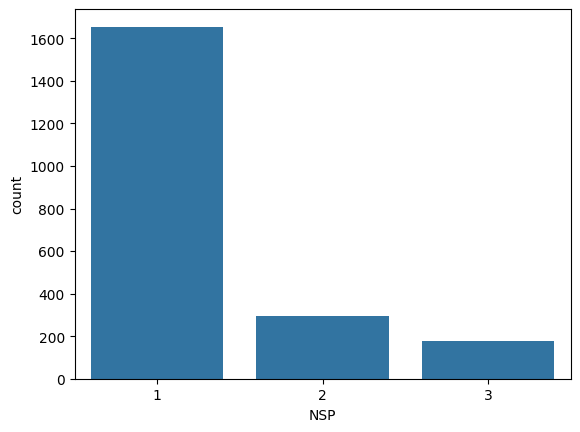

In [13]:
sns.countplot(cardio_data, x="NSP")

Next, we are going to use the train_test_split from Scikit Learn to divide the data into a training dataset and a test dataset.
Normalising the data is important when training a neural network. Not doing so may mean it takes longer to converge during training or fails to converge at all. In this workshop we will use the StandardScaler estimator from Scikit Learn. This scales the data so that the mean of each variable is 0, and the standard deviation is 1.
We also deduct 1 from the values of the class labels in the NSP column. This is because Keras assumes our class labels start at 0, whereas on page 5 you can see that for this dataset the class labels are 1, 2 and 3. Once we have deducted 1, class 0 is Normal, class 1 is Suspect, and class 2 is Pathologic.

In [14]:
X = cardio_data.drop("NSP", axis=1)
y = cardio_data["NSP"] -1

In [15]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Part Two: Building and Training Our Neural Network

In [17]:
model = tf.keras.models.Sequential()

In [18]:
model.add(tf.keras.layers.Dense(9,activation='relu',input_shape=(14,)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Similar to the way we train a model in Scikit Learn, we use the fit method to train the model. At this stage we can set the following parameters.

• batch_size: This is the number of training examples which are fed through the network in one go before updating the weights.

• epochs: In one epoch, all the training data is passed through the network once.

• verbose: This determines how much information we are given on the training and setting this to 2 outputs more detailed information as we go through the training.

• validation_split: This determines how much data is left out of the training data and used to calculate the validation metrics during each epoch.

Because we have imbalanced classes, there are many more observations of the class 0, and so this will have a larger impact on the overall value of the loss function than observations belonging to the other two classes. In practice, this is likely to mean the resulting trained model may be more accurate at correctly identifying observations in class 0 than in the other two classes. We
16
can address this when training by weighting the classes in inverse proportion to the % of observations in that class. We use the class_weights parameter to do this.

In [36]:
class_weights = { 0:1, 1:5.6, 2:9.4}

history = model.fit(X_train, np.asarray(y_train), \
                    batch_size = 32, epochs= 200, \
                    verbose=2, class_weight=class_weights, \
                    validation_split=0.2)

Epoch 1/200
43/43 - 0s - 6ms/step - accuracy: 0.8809 - loss: 0.6329 - val_accuracy: 0.8529 - val_loss: 0.3087
Epoch 2/200
43/43 - 0s - 6ms/step - accuracy: 0.8831 - loss: 0.6255 - val_accuracy: 0.8588 - val_loss: 0.3106
Epoch 3/200
43/43 - 0s - 5ms/step - accuracy: 0.8882 - loss: 0.6250 - val_accuracy: 0.8559 - val_loss: 0.3051
Epoch 4/200
43/43 - 0s - 6ms/step - accuracy: 0.8846 - loss: 0.6255 - val_accuracy: 0.8559 - val_loss: 0.3117
Epoch 5/200
43/43 - 0s - 8ms/step - accuracy: 0.8912 - loss: 0.6224 - val_accuracy: 0.8588 - val_loss: 0.3067
Epoch 6/200
43/43 - 0s - 6ms/step - accuracy: 0.8882 - loss: 0.6191 - val_accuracy: 0.8529 - val_loss: 0.3121
Epoch 7/200
43/43 - 0s - 11ms/step - accuracy: 0.8816 - loss: 0.6179 - val_accuracy: 0.8559 - val_loss: 0.3092
Epoch 8/200
43/43 - 0s - 10ms/step - accuracy: 0.8831 - loss: 0.6197 - val_accuracy: 0.8559 - val_loss: 0.3063
Epoch 9/200
43/43 - 0s - 7ms/step - accuracy: 0.8860 - loss: 0.6175 - val_accuracy: 0.8559 - val_loss: 0.3088
Epoch 10

Part Three: Evaluating Our Neural Network
Now we have trained our neural network we want to review the accuracy and validation metrics and also see how this network performs when making predictions for the test data which we held back.
12)
Once the training has completed, we can plot the training and validation accuracy using the below code.

In [39]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

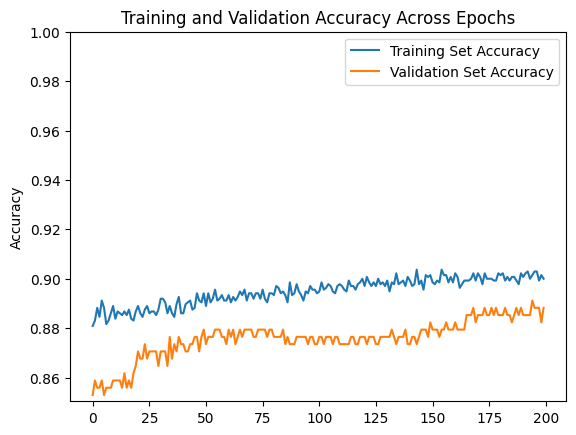

In [40]:
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

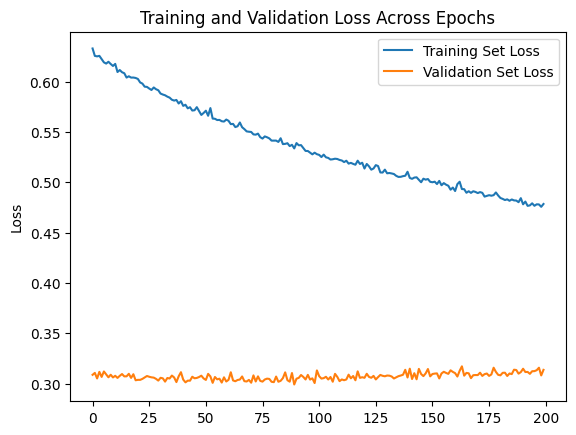

In [41]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

From Scikit Learn, we are going to imprt the confusion_matrix nd classification report functions which we can use to evaluate our model performance on the test data.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

We can use the predict function on our trained model to generate predictions for the test data. This will output three values for each observation, one for each of the output neurons. Since these are the probabilities that the observation belongs to each of the three classes, we want to pick the class which has the highest associated probability value. We can use the argmax function for this.

In [43]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Use the confusion_matrix function to generate a confusion matrix using our generated predictions (y_pred) and the true class labels for the test data (y_test). We use a seaborn heatmap to visualise these results.

In [44]:
confusion_matrix = confusion_matrix(y_test,y_pred)

Plot Heatmap for the confusion matrix

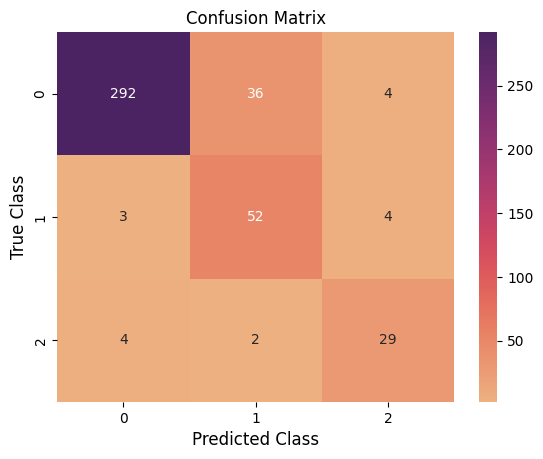

In [47]:
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

Finally, we can use the classification_report function to view some key evaluation metrics for this model.

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       332
           1       0.58      0.88      0.70        59
           2       0.78      0.83      0.81        35

    accuracy                           0.88       426
   macro avg       0.78      0.86      0.81       426
weighted avg       0.91      0.88      0.88       426

